In [2]:
import numpy as nd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

encoding ='unicode_escape'

In [3]:
df=pd.read_csv(r"C:\Users\pc\Downloads\archive (4)\bank_transactions_data_2.csv")

In [4]:
df

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,4/11/2023 16:29,Debit,San Diego,162.198.218.92,ATM,70,Doctor,1,5112.21,11/4/2024 8:08
1,TX000002,AC00455,376.24,6/27/2023 16:44,Debit,Houston,13.149.61.4,ATM,68,Doctor,1,13758.91,11/4/2024 8:09
2,TX000003,AC00019,126.29,7/10/2023 18:16,Debit,Mesa,215.97.143.157,Online,19,Student,1,1122.35,11/4/2024 8:07
3,TX000004,AC00070,184.50,5/5/2023 16:32,Debit,Raleigh,200.13.225.150,Online,26,Student,1,8569.06,11/4/2024 8:09
4,TX000005,AC00411,13.45,10/16/2023 17:51,Credit,Atlanta,65.164.3.100,Online,26,Student,1,7429.40,11/4/2024 8:06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2507,TX002508,AC00297,856.21,4/26/2023 17:09,Credit,Colorado Springs,21.157.41.17,Branch,33,Doctor,1,12690.79,11/4/2024 8:11
2508,TX002509,AC00322,251.54,3/22/2023 17:36,Debit,Tucson,49.174.157.140,Branch,48,Doctor,1,254.75,11/4/2024 8:11
2509,TX002510,AC00095,28.63,8/21/2023 17:08,Debit,San Diego,58.1.27.124,Branch,56,Retired,1,3382.91,11/4/2024 8:08
2510,TX002511,AC00118,185.97,2/24/2023 16:24,Debit,Denver,21.190.11.223,Online,23,Student,1,1776.91,11/4/2024 8:12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   IP Address               2512 non-null   object 
 7   Channel                  2512 non-null   object 
 8   CustomerAge              2512 non-null   int64  
 9   CustomerOccupation       2512 non-null   object 
 10  LoginAttempts            2512 non-null   int64  
 11  AccountBalance           2512 non-null   float64
 12  PreviousTransactionDate  2512 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 255.3+ KB


In [6]:
pd.isnull(df).sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
IP Address                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

# find the outliers and hendel the outliers

In [7]:
df.describe()

,TransactionAmount,CustomerAge,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,1.124602,5114.302966
std,291.946243,17.792198,0.602662,3900.942499
min,0.260000,18.000000,1.000000,101.250000
25%,81.885000,27.000000,1.000000,1504.370000
50%,211.140000,45.000000,1.000000,4735.510000
75%,414.527500,59.000000,1.000000,7678.820000
max,1919.110000,80.000000,5.000000,14977.990000


# TransactionAmount

In [8]:
Min=df["TransactionAmount"].min()
q1= df["TransactionAmount"].quantile(0.25)
q2= df["TransactionAmount"].quantile(0.50)
q3= df["TransactionAmount"].quantile(0.75)
Max=df["TransactionAmount"].max()

IQR=q3-q1

upper_fence=q3+(1.5*IQR)
lower_fence=q1-(1.5*IQR)

In [9]:
print(Min)
print(q1)
print(q2)
print(q3)
print(Max)

0.26
81.885
211.14
414.52750000000003
1919.11


In [10]:
print(upper_fence)
print(lower_fence)

913.49125
-417.07875000000007


In [11]:
df[df["TransactionAmount"]>upper_fence].shape[0]

113

In [12]:
(113/df.shape[0])*100

4.498407643312102

<Axes: xlabel='TransactionAmount'>

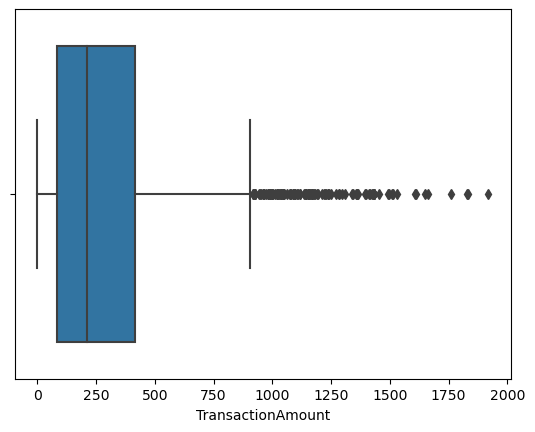

In [13]:
sns.boxplot(x="TransactionAmount",data=df)

In [14]:
def hendel(a):
    if a>upper_fence:
        return 913
    else:
        return a

In [15]:
df["TransactionAmount"]=df["TransactionAmount"].apply(hendel)

In [16]:
df[df["TransactionAmount"]>upper_fence]

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,LoginAttempts,AccountBalance,PreviousTransactionDate


In [17]:
df[df["TransactionAmount"]<lower_fence]

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,LoginAttempts,AccountBalance,PreviousTransactionDate


<Axes: xlabel='TransactionAmount'>

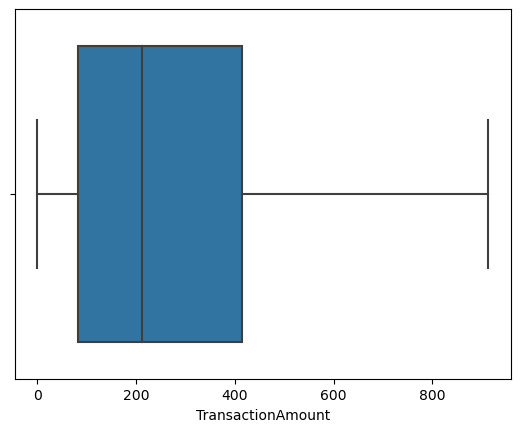

In [18]:
sns.boxplot(x="TransactionAmount",data=df)

# CustomerAge

In [18]:
Min=df["CustomerAge"].min()
q1= df["CustomerAge"].quantile(0.25)
q2= df["CustomerAge"].quantile(0.50)
q3= df["CustomerAge"].quantile(0.75)
Max=df["CustomerAge"].max()

IQR=q3-q1

upper_fence=q3+(1.5*IQR)
lowerfence =q1-(1.5*IQR)


In [19]:
print(Min)
print(q1)
print(q2)
print(q3)
print(Max)

18
27.0
45.0
59.0
80


In [20]:
print(upper_fence)
print(lower_fence)

107.0
-417.07875000000007


In [21]:
df[df["CustomerAge"]>upper_fence]

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,LoginAttempts,AccountBalance,PreviousTransactionDate


<Axes: xlabel='CustomerAge'>

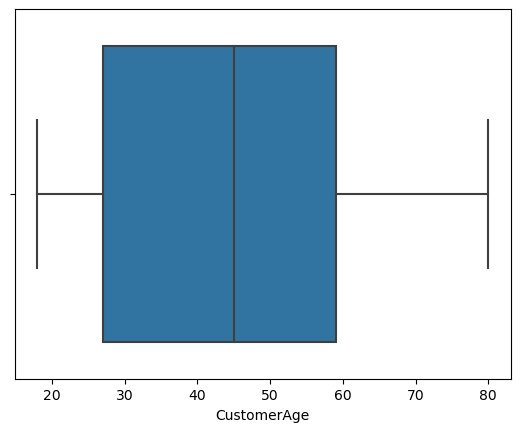

In [22]:
sns.boxplot(x="CustomerAge",data=df)

# AccountBalance

In [23]:
Min=df["AccountBalance"].min()
q1= df["AccountBalance"].quantile(0.25)
q2= df["AccountBalance"].quantile(0.50)
q3= df["AccountBalance"].quantile(0.75)
Max=df["AccountBalance"].max()

IQR=q3-q1

upper_fence=q3+(1.5*IQR)
lowerfence =q1-(1.5*IQR)

In [24]:
print(Min)
print(q1)
print(q2)
print(q3)
print(Max)

101.25
1504.3700000000001
4735.51
7678.82
14977.99


In [25]:
print(upper_fence)
print(lower_fence)

16940.495
-417.07875000000007


In [26]:
df[df["AccountBalance"]>upper_fence]

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,LoginAttempts,AccountBalance,PreviousTransactionDate


In [27]:
df[df["AccountBalance"]<lower_fence]

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,LoginAttempts,AccountBalance,PreviousTransactionDate


<Axes: xlabel='AccountBalance'>

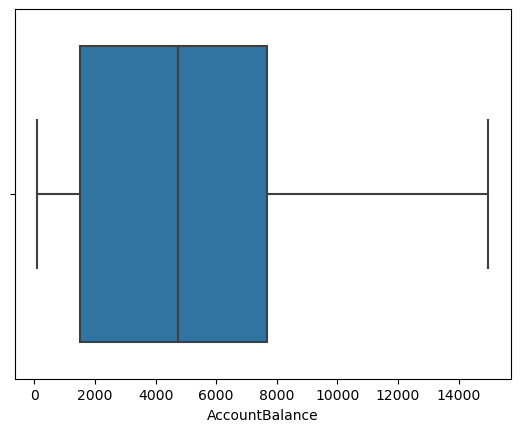

In [28]:
sns.boxplot(x="AccountBalance",data=df)

# sum of transactiom amount by customer occupation

In [30]:
df.groupby(["CustomerOccupation"],as_index=False)["TransactionAmount"].sum()


,CustomerOccupation,TransactionAmount
0,Doctor,177429.46
1,Engineer,172789.58
2,Retired,169611.52
3,Student,195650.22


<Axes: xlabel='CustomerOccupation', ylabel='TransactionAmount'>

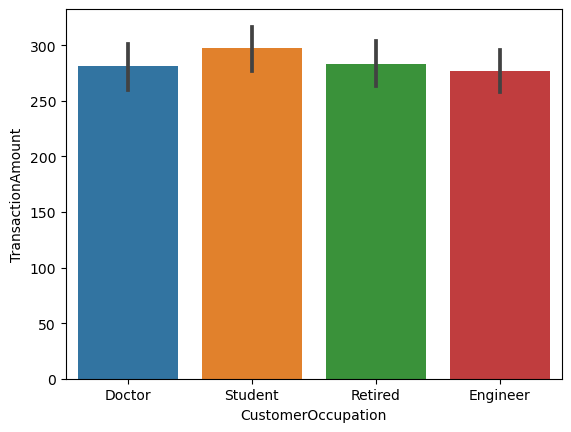

In [31]:
sns.barplot(x="CustomerOccupation",y="TransactionAmount",data=df)

# sum of login attermpts by customer occupation

In [32]:
df.groupby(["CustomerOccupation"],as_index=False)["LoginAttempts"].sum()

,CustomerOccupation,LoginAttempts
0,Doctor,723
1,Engineer,699
2,Retired,675
3,Student,728


<Axes: xlabel='CustomerOccupation', ylabel='LoginAttempts'>

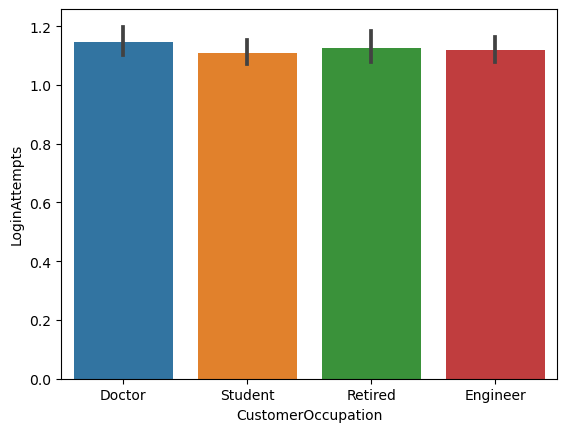

In [33]:
sns.barplot(x="CustomerOccupation",y="LoginAttempts",data=df)

# How many payments have been made through branch ATM online?

In [34]:
df['Channel'].value_counts()

Channel
Branch    868
ATM       833
Online    811
Name: count, dtype: int64

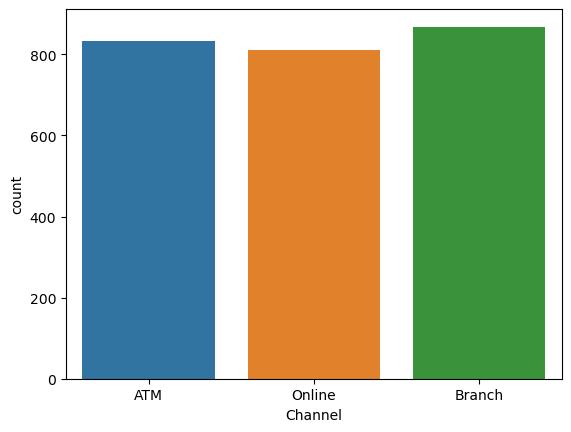

In [35]:
df=sns.countplot(x='Channel',data=df)

#for bars in df.containers:
   # df.bar_label(bars)

# sum of transaction amount by channel

In [28]:
df.groupby(["Channel"],as_index=False)["TransactionAmount"].sum()

,Channel,TransactionAmount
0,ATM,243396.80
1,Branch,240986.36
2,Online,231097.62


<Axes: xlabel='Channel', ylabel='TransactionAmount'>

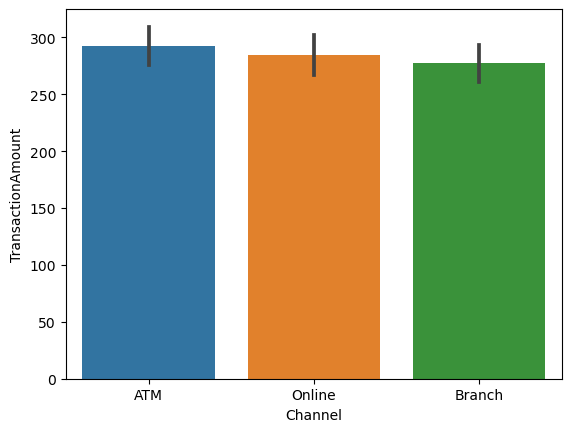

In [19]:
sns.barplot(x='Channel',y='TransactionAmount',data=df)

# sum of account balance by CustomerOccupation

In [22]:
df.groupby(["CustomerOccupation"],as_index=False)["AccountBalance"].sum()

,CustomerOccupation,AccountBalance
0,Doctor,5665745.25
1,Engineer,3429003.79
2,Retired,2720752.05
3,Student,1031627.96


<Axes: xlabel='CustomerOccupation', ylabel='AccountBalance'>

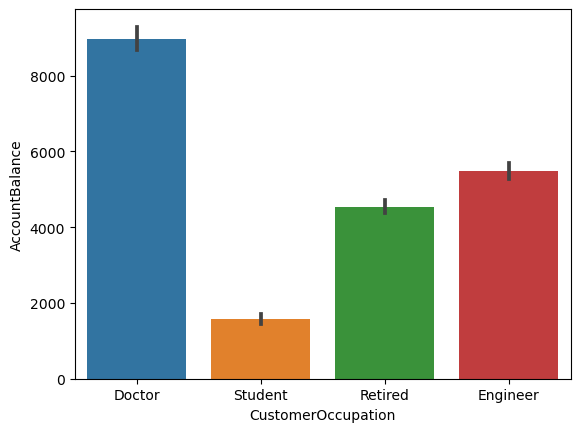

In [23]:
sns.barplot(x='CustomerOccupation', y='AccountBalance', data=df)

# Most frequent transactions

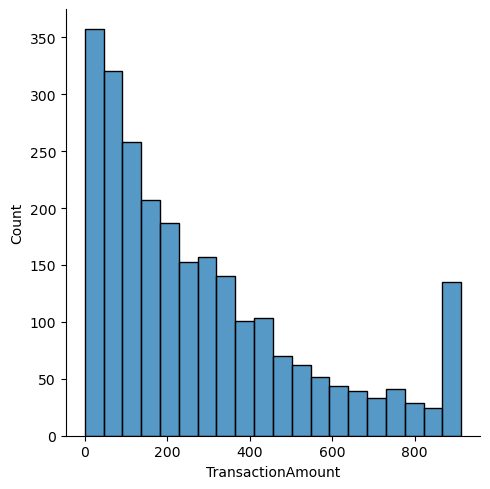

In [24]:
sns.displot(df["TransactionAmount"],bins=20)

# sum of transaction amount by location

<Axes: xlabel='TransactionAmount', ylabel='Location'>

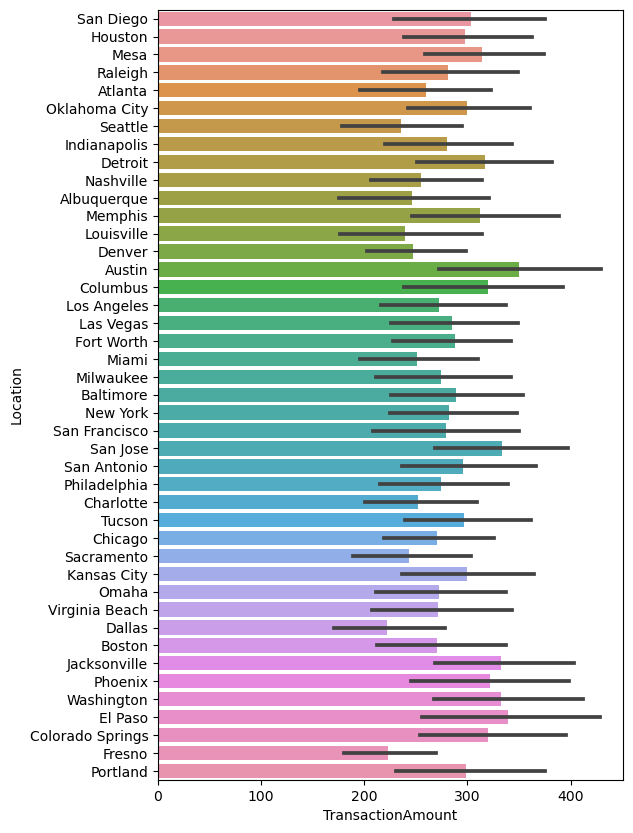

In [25]:
plt.figure(figsize=(6,10))
sns.barplot(x="TransactionAmount", y="Location",data=df)

In [ ]:
Top 10 transaction location Austin,Colorado, Springs,Detroit,Fort Worth,Jacksonville,Los Angeles,Memphis,Oklahoma City
,San Jose,Tucson


# sum of customer age by location

In [26]:
df.groupby(["CustomerAge"],as_index=False)["LoginAttempts"].sum().all

<bound method NDFrame._add_numeric_operations.<locals>.all of     CustomerAge  LoginAttempts
0            18             65
1            19             69
2            20             63
3            21             73
4            22             66
..          ...            ...
58           76             26
59           77             19
60           78             25
61           79             27
62           80             26

[63 rows x 2 columns]>

<Axes: xlabel='CustomerAge', ylabel='LoginAttempts'>

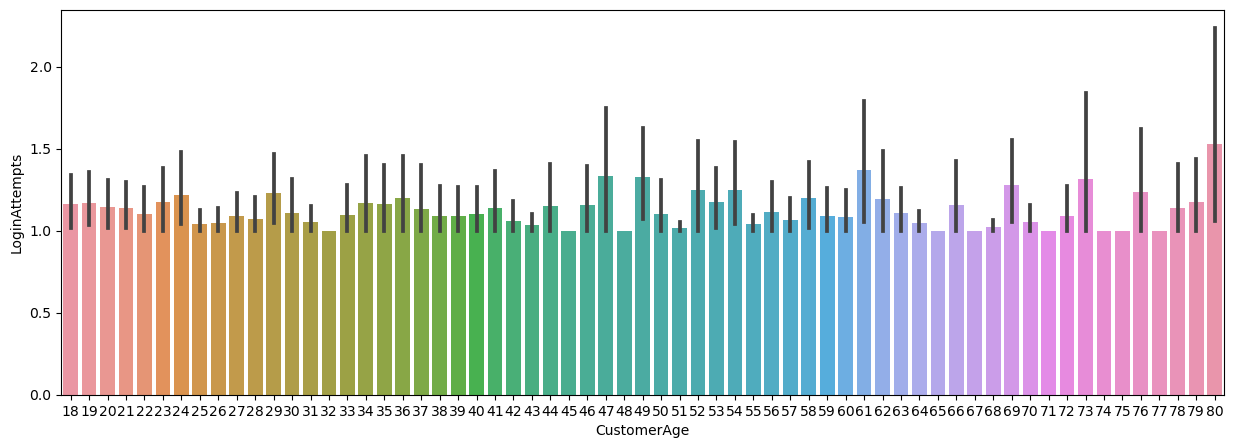

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(x="CustomerAge", y="LoginAttempts",data=df)

In [ ]:
+